In [1]:
# 항상 분석 전 디폴트 라이브러리 임포트

import pandas as pd
import numpy as np
import seaborn as sns
from IPython.display import set_matplotlib_formats
import matplotlib
import warnings
warnings.filterwarnings(action="ignore")

matplotlib.rc('font', family='AppleGothic')
set_matplotlib_formats('retina')
matplotlib.rc('axes', unicode_minus=False)

pd.options.display.max_rows=100
pd.options.display.max_columns=100
pd.set_option('display.float_format', '{:.2f}'.format)

### 4. 모델 훈련

선형 회귀 훈련시키는 법
1. 직접 계산할 수 있는 공식을 사용하여 훈련 세트에 가장 잘 맞는 모델 파라미터(즉, 훈련 세트에 대해 비용 함수를 최소화하는 모델 파라미터)를 해석적으로 구한다.
2. 경사 하강법(GD)이라 불리는 반복적인 최적화 방식을 사용하여 모델 파라미터를 조금씩 바꾸면서 비용 함수를 훈련 세트에 대해 최소화시킨다.

### 4.1 선형 회귀

### 4.1.1 정규방정식

비용 함수를 최소화하는 세타 값을 찾기 위한 해석적인 방법이 있다. 바로 결과를 얻을 수 있는 수학 공식으로, 이를 정규방정식이라고 한다.

Normal Equation 
$$ θ^ = (X^{T} * X)^{-1}*X^{T}*y $$

In [2]:
import numpy as np

X = 2 * np.random.rand(100, 1)
y = 4 + 3 * X + np.random.rand(100, 1)

In [3]:
X_b = np.c_[np.ones((100, 1)), X]
theta_best = np.linalg.inv(X_b.T.dot(X_b)).dot(X_b.T).dot(y) #정규방정식

In [4]:
theta_best

array([[4.52685974],
       [2.96543976]])

In [5]:
X_new = np.array([[0], [2]])
X_new_b = np.c_[np.ones((2,1)), X_new]
y_predict = X_new_b.dot(theta_best)
y_predict

array([[ 4.52685974],
       [10.45773926]])

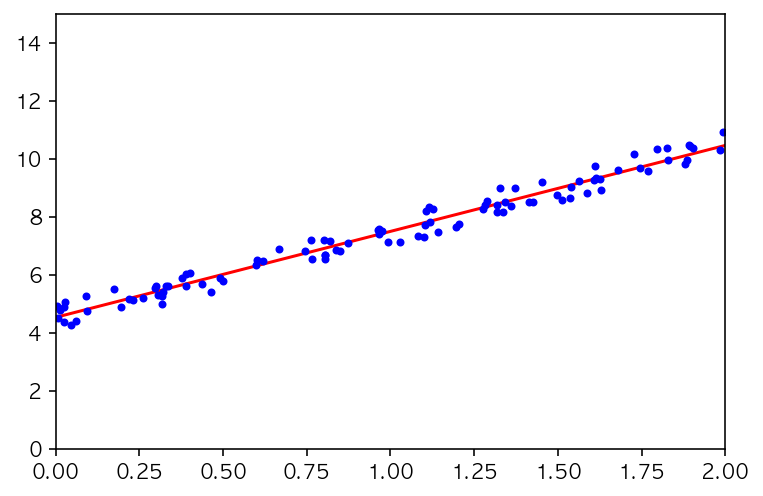

In [6]:
import matplotlib.pyplot as plt

plt.plot(X_new, y_predict, "r-")
plt.plot(X, y, "b.")
plt.axis([0, 2, 0, 15])
plt.show()

In [7]:
from sklearn.linear_model import LinearRegression

lin_reg = LinearRegression()
lin_reg.fit(X, y)
lin_reg.intercept_, lin_reg.coef_

(array([4.52685974]), array([[2.96543976]]))

In [8]:
lin_reg.predict(X_new)

array([[ 4.52685974],
       [10.45773926]])

정규방정식을 통해 best_theta를 구해서 얻은 회귀 결과와 모델의 회귀 결과가 같다.

### 4.1.2 계산 복잡도

특성 수가 매우 많아지면 (예를 들면 100,000개) 정규방정식이 매우 느려진다.

때문에 특성이 매우 많고 훈련 샘플이 너무 많아 메모리에 모두 담을 수 없을 때는 아래 방법을 사용하는 것이 적합하다.

### 4.2 경사 하강법

경사 하강법(Gradient Descent = GD)은 여러 종류의 문제에서 최적의 해법을 찾을 수 있는 매우 일반적인 최적화 알고리즘이다. 경사 하강법의 기본 아이디어는 비용 함수를 최소화하기 위해 반복해서 파라미터를 조정해가는 것이다.

* 경사 하강법을 사용할 때는 반드시 모든 특성이 같은 스케일을 갖도록 만들어야 한다. (예를 들어 사이킷런의 StandardScaler를 사용하여), 그렇지 않으면 수렴하는 데 훨씬 오래 걸린다.

### 4.2.1 배치 경사 하강법

매 경사 하강법 스텝에서 전체 훈련 세트 X에 대해 계산한다. 그래서 이 알고리즘을 배치 경사 하강법(Batch Gradient Descent)라고 한다.
즉, 매 스텝에서 훈련 데이터 전체를 사용한다. 이런 이유로 매우 큰 훈련 세트에서는 아주 느리다.(확률 경사 하강법은 훨씬 빠르다) 그러나 경사 하강법은 특성 수에는 민감하지 않다. 수십만 개의 특성에서 선형 회귀를 훈련시키려면 정규방정식보다 경사 하강법을 사용하는 편이 훨씬 빠르다.

In [9]:
eta = 0.1 # 학습률
n_iterations = 1000
m = 100

theta = np.random.randn(2,1) # 무작위 초기화

for iteration in range(n_iterations):
    gradients = 2/m * X_b.T.dot(X_b.dot(theta) - y)
    theta = theta - eta * gradients
    
theta

array([[4.52685974],
       [2.96543976]])

In [10]:
eta = 0.02 # 학습률
n_iterations = 1000
m = 100

theta = np.random.randn(2,1) # 무작위 초기화

for iteration in range(n_iterations):
    gradients = 2/m * X_b.T.dot(X_b.dot(theta) - y)
    theta = theta - eta * gradients
    
theta

array([[4.52477163],
       [2.96724301]])

In [11]:
eta = 0.5 # 학습률
n_iterations = 1000
m = 100

theta = np.random.randn(2,1) # 무작위 초기화

for iteration in range(n_iterations):
    gradients = 2/m * X_b.T.dot(X_b.dot(theta) - y)
    theta = theta - eta * gradients
    
theta

array([[-1.21406809e+49],
       [-1.40585639e+49]])

학습률이 0.1이 가장 적당하다. 적절한 학습률을 찾으려면 그리드 탐색을 사용한다. 하지만 그리드 탐색에서 수렴하는 데 너무 오래 걸리는 모델을 막기 위해 반복 횟수를 제한해야 한다.

### 4.2.2 확률적 경사 하강법

배치 경사 하강법의 가장 큰 문제는 매 스텝에서 전체 훈련 세트를 사용해 그래디언트를 계산한다는 것이다. 훈련 세트가 커지면 매우 느려지게 된다.

이와는 정반대로 **확률적 경사 하강법**은 매 스텝에서 딱 한 개의 샘플을 무작위로 선택하고 그 하나의 샘플에 대한 그래디언트를 계산한다. 매 반복에서 매우 적은 데이터만 처리하기 때문에 알고리즘이 확실히 훨씬 빠르다.

In [12]:
n_epoch = 50
t0, t1 = 5, 50 # 학습 스케줄 하이퍼파라미터

def learning_schedule(t):
    return t0 / (t + t1)

theta = np.random.randn(2,1) # 무작위 초기화

for epoch in range(n_epoch):
    for i in range(m):
        random_index = np.random.randint(m)
        xi = X_b[random_index:random_index+1]
        yi = y[random_index:random_index+1]
        gradients = 2 * xi.T.dot(xi.dot(theta) - yi)
        eta = learning_schedule(epoch * m + i)
        theta = theta - eta * gradients

학습률을 점진적으로 감소시키도록 학습 스케줄을 만드는데, 위 코드는 간단한 학습 스케줄을 사용한 확률적 경사 하강법의 구현이다.

In [13]:
theta

array([[4.52902346],
       [2.96356658]])

샘플을 무작위로 선택하기 때문에 어떤 샘플은 한 에포크에서 여러 번 선택될 수 있고 어떤 샘플은 전혀 선택되지 못할 수 있습니다. 알고리즘이 에포크마다 모든 샘플을 사용하게 하려면 훈련 세트를 섞은 후 차례대로 하나씩 선택하고 다음 에포크에서 다시 섞는 식의 방법을 사용할 수 있습니다. 그러나 이렇게 하면 보통 더 늦게 수렴됩니다.

사이킷런에서 SGD방식으로 선형 회귀를 사용하려면 기본값으로 제곱 오차 비용 함수를 최적화하는 SGDRegressor클래스를 사용합니다. 다음 코드는 학습률 0.1(eta0=0.1)로 기본 학습 스케줄을 사용해 에포크를 50번 수행합니다. (규제는 사용하지 않았습니다(penalty=None))

In [14]:
from sklearn.linear_model import SGDRegressor
sgd_reg = SGDRegressor(max_iter=50, penalty=None, eta0=0.1)
sgd_reg.fit(X, y.ravel())

SGDRegressor(eta0=0.1, max_iter=50, penalty=None)

In [15]:
sgd_reg.intercept_, sgd_reg.coef_

(array([4.5039143]), array([2.97691056]))

### 4.2.3 미니배치 경사 하강법

각 스텝에서 전체 훈련세트(배치 경사 하강법처럼)나 하나의 샘플(확률적 경사 하강법처럼)을 기반으로 그래디언트를 계산하는 것이 아니라 미니배치라 부르는 임의의 작은 샘플 세트에 대해 그래디언트를 계산한다. 확률적 경사 하강법에 비해 미니배치 경사 하강법의 주요 장점은 행렬 연산에 최적화된 하드웨어, 특히 GPU를 사용해서 얻는 성능 향상이다.

###  4.3 다항 회귀

In [16]:
m = 100
X = 6 * np.random.rand(m, 1) - 3
y = 0.5 * X**2 + X + 2 + np.random.randn(m, 1)

In [17]:
from sklearn.preprocessing import PolynomialFeatures
poly_features = PolynomialFeatures(degree=2, include_bias=False)
X_poly = poly_features.fit_transform(X)
X[0]

array([1.76232175])

In [18]:
X_poly[0]

array([1.76232175, 3.10577794])

In [19]:
lin_reg = LinearRegression()
lin_reg.fit(X_poly, y)
lin_reg.intercept_, lin_reg.coef_

(array([1.89672366]), array([[1.00317885, 0.50163767]]))

polynomialFeatures는 주어진 차수까지 특성 간의 모든 교차항을 추가한다.

ex) a, b, degree=3 -> a^2, a^3, b^2, b^3, ab, a^2b, ab^2

### 4.4 학습 곡선

얼마나 복잡한 모델을 사용할지 결정하는 법, 모델이 데이터에 과대적합 또는 과소적합되었는지 알아내는 법

=> 교차 검증 / 학습 곡선

학습 곡선 = 훈련 세트와 검증 세트의 모델 성능을 훈련 세트 크기의 함수로 나타낸다.

In [20]:
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split

def plot_learning_curves(model, X, y):
    X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2)
    train_errors, val_errors = [], []
    for m in range(1, len(X_train)):
        model.fit(X_train[:m], y_train[:m])
        y_train_predict = model.predict(X_train[:m])
        y_val_predict = model.predict(X_val)
        train_errors.append(mean_squared_error(y_train[:m], y_train_predict))
        val_errors.append(mean_squared_error(y_val, y_val_predict))
    plt.plot(np.sqrt(train_errors), "r-+", linewidth=2, label="훈련 세트")
    plt.plot(np.sqrt(val_errors), "b-", linewidth=3, label="검증 세트")

(0.0, 3.0)

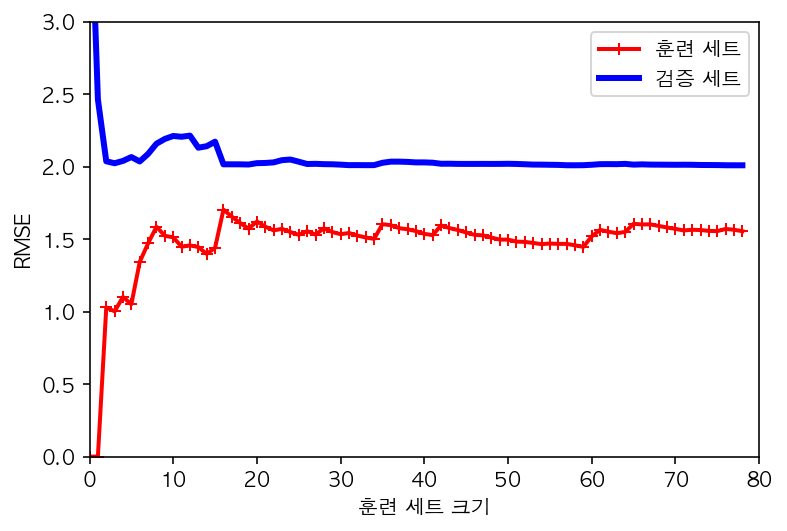

In [21]:
lin_reg = LinearRegression()
plot_learning_curves(lin_reg, X, y)
plt.legend()
plt.xlabel("훈련 세트 크기")
plt.ylabel("RMSE")
plt.xlim(0,80, 10)
plt.ylim(0,3, 0.5)

선형 회귀의 직선은 데이터를 잘 모델링할 수 없으므로(노이즈도 있고 비선형이기 때문) 오차의 감소가 완만해져서 훈련 세트의 그래프와 가까워진다.(과소적합 모델의 전형적인 모습, 두 곡선이 수평한 구간을 만들고 꽤 높은 오차에서 매우 가까이 근접해있다.)

(0.0, 3.0)

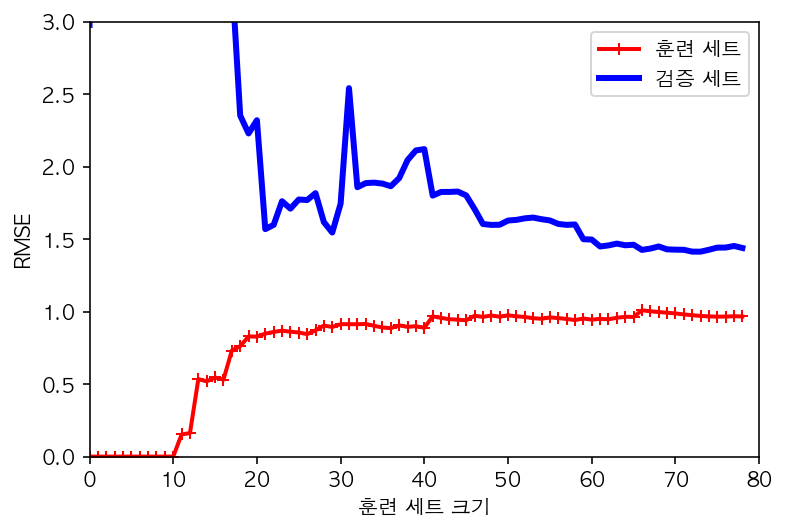

In [22]:
from sklearn.pipeline import Pipeline

polynomial_regression = Pipeline([
    ("poly_features", PolynomialFeatures(degree=10, include_bias=False)),
    ("lin_reg", LinearRegression()),
])

plot_learning_curves(polynomial_regression, X, y)
plt.legend()
plt.xlabel("훈련 세트 크기")
plt.ylabel("RMSE")
plt.xlim(0,80, 10)
plt.ylim(0,3, 0.5)

- 훈련 데이터의 오차가 선형 회귀 모델보다 훨씬 낮다.
- 두 곡선 사이에 공간이 있다. 이 말은 훈련 데이터에서의 모델 성능이 검증 데이터에서보다 훨씬 낫다는 뜻이고, 이는 과대적합 모델의 특징이다. 그러나 더 큰 훈련 세트를 사용하면 두 곡선이 점점 가까워진다.

**편향/분산 트레이드오프**

- 편향(bias) : 일반화 오차 중에서 편향은 잘못된 가정으로 인한 것입니다. 예를 들어 데이터가 실제로는 2차인데 선형으로 사정하는 경우입니다. 편향이 큰 모델은 훈련 데이터에 과소적합되기 쉽습니다.
- 분산(variance) : 분산은 훈련 데이터에 있는 작은 변동에 모델이 과도하게 민감하기 때문에 나타납니다. 자유도가 높은 모델(예를 들면 고차 다항 회귀 모델)이 높은 분산을 가지기 쉬워 훈련 데이터에 과대적합되는 경향이 있습니다.
- 줄일 수 없는 오차(irreducible error)는 데이터 자체에 있는 노이즈 때문에 발생합니다. 이 오차를 줄일 수 있는 유일한 방법은 데이터에서 노이즈를 제거하는 것입니다.(예를 들어 고장 난 센서 같은 데이터 소스를 고치거나 이상치를 감지해 제거합니다.)

모델의 복잡도가 커지면 통상적으로 분산이 늘어나고 편향은 줄어듭니다. 반대로 모델의 복잡도가 줄어들면 편향이 커지고 분산이 작아집니다. 그래서 트레이드오프라고 부릅니다.

### 4.5 규제가 있는 선형 모델

과대적합을 감소시키는 좋은 방법은 모델을 규제하는 것이다. 자유도를 줄이면 데이터에 과대적합되기 더 어려워진다. 예를 들어 다항 회귀 모델을 규제하는 간단한 방법은 다항식의 차수를 감소시키는 것이다.

### 4.5.1 릿지 회귀

- 선형회귀와 마찬가지로 릿지 회귀를 계산하기 위해 정규방정식을 사용할 수도 있고,
$$ θ^  = (X^T*X + αA)^{-1} *X^T *y $$
- 경사 하강법을 사용할 수도 있다.


하이퍼파라미터 α는 모델을 얼마나 많이 규제할지 조절한다. α=0이면 릿지 회귀는 선형 회귀와 같아진다. α이 아주 크면 모든 가중치가 거의 0에 가까워지고 결국 데이터의 평균을 지나는 수평선이 된다.

In [23]:
from sklearn.linear_model import Ridge
ridge_reg = Ridge(alpha=1, solver="cholesky")
ridge_reg.fit(X, y)
ridge_reg.predict([[1.5]])

array([[4.77973491]])

In [25]:
sgd_reg = SGDRegressor(max_iter=5, penalty="l2") # 노름2 (L2)규제 사용
sgd_reg.fit(X, y.ravel())
sgd_reg.predict([[1.5]])

array([3.97278683])

### 4.5.2 라쏘 회귀

라쏘 회귀의 중요한 특징은 덜 중요한 특성의 가중치를 완전히 제거하려고 한다는 점이다.

In [26]:
from sklearn.linear_model import Lasso
lasso_reg = Lasso(alpha=0.1)
lasso_reg.fit(X, y)
lasso_reg.predict([[1.5]])

array([4.73145924])

In [27]:
sgd_reg = SGDRegressor(max_iter=5, penalty="l1") # 노름1 (L1)규제 사용
sgd_reg.fit(X, y.ravel())
sgd_reg.predict([[1.5]])

array([3.94093811])

### 4.5.3 엘라스틱넷

엘라스틱넷(Elastic Net)은 릿지 회귀와 라쏘 회귀를 절충한 모델이다. 규제항은 릿지와 회귀의 규제항을 단순히 더해서 사용하며, 혼합 정도는 혼합 비율 r을 사용해 조절한다. r=0이면 엘라스틱넷은 릿지 회귀와 같고, r=1이면 라쏘 회귀와 같다.

In [28]:
from sklearn.linear_model import ElasticNet
elastic_net = ElasticNet(alpha=0.1, l1_ratio=0.5) # l1_ratio = 혼합 비율 r
elastic_net.fit(X, y)
elastic_net.predict([[1.5]])

array([4.73236151])

적어도 규제가 약간 있는 것이 대부분의 경우에 좋으므로 일반적으로 평범한 선형 회귀는 피한다. 릿지가 기본이 되지만 실제로 쓰이는 특성이 몇 개뿐이라고 의심되면 라쏘나 엘라스틱넷이 더 낫다. 이 모델들은 불필요한 특성의 가중치를 0으로 만들어주기 때문이다. 특성 수가 훈련 샘플 수보다 많거나 특성 몇 개가 강하게 연관되어 있을 때는 보통 라쏘가 문제를 일으키므로 라쏘보다는 엘라스틱넷을 선호한다.

### 4.5.4 조기 종료

경사 하강법과 같은 반복적인 학습 알고리즘을 규제하는 아주 색다른 방식은 검증 에러가 최솟값에 도달하면 바로 훈련을 중지시키는 것이다. 이를 조기 종료(early-stopping)라고 한다.

에포크가 진행됨에 따라 알고리즘이 점차 학습되어 훈련 세트에 대한 예측 에러(RSME)와 검증 세트에 대한 예측 에러가 줄어들지만, 감소하던 검증 에러가 멈추었다가 다시 상승하게 되기도 한다. 이는 모델이 훈련 데이터에 과대적합되기 시작하는 것을 의미한다. **조기 종료**는 검증에러가 최소에 도달하는 즉시 훈련을 멈춘다.

In [31]:
from sklearn.base import clone # clone = 모델만 복사
# from sklearn.preprocessing import StandardScaler

# 데이터 준비
poly_scaler = Pipeline([
    ("poly_features", PolynomialFeatures(degree=90, include_bias=False)),
    ("std_scaler", StandardScaler()),
])
X_train_poly_scaled = poly_scaler.fit_transform(X_train)
X_val_poly_scaled = poly_scaler.transform(X_val)

sgd_reg = SGDRegressor(n_iter=1, warm_start=True, penalty=None,
                      learning_rate="constant", eta0=0.0005)

minimum_val_error = float("inf")
best_epoch = None
best_model = None
for epoch in range(1000):
    sgd_reg.fit(X_train_poly_scaled, y_train)
    y_val_predict = sgd_reg.predict(X_val_poly_scaled)
    val_error = mean_squared_error(y_val, y_val_predict)
    if val_error < minimum_val_error:
        minimum_val_error = val_error
        best_epoch = epoch
        best_model = clone(sgd_reg)

NameError: name 'X_train' is not defined

### 4.6 로지스틱 회귀

### 4.6.1 확률 추정

시그모이드 함수를 이용

$$ σ(t) = \frac{1}{1+exp(-t)} $$
t<0이면 σ(t)<0.5이고, t≥0 이면 σ(t)≥0.5이다.

p<0.5이면 0(음성클래스)으로, p≥0.5이면 1(양성클래스)로 예측한다.

### 4.6.2 훈련과 비용 함수

### 4.6.3 결정 경계

In [37]:
from sklearn import datasets
iris = datasets.load_iris()
list(iris.keys())

['data',
 'target',
 'frame',
 'target_names',
 'DESCR',
 'feature_names',
 'filename']

In [38]:
X = iris["data"][: ,3:] # 꽃잎의 너비
y = (iris["target"] == 2).astype(np.int) # 1 Iris-Virginica면 1, 그렇지 않으면 0

In [39]:
from sklearn.linear_model import LogisticRegression

log_reg = LogisticRegression()
log_reg.fit(X, y)

LogisticRegression()

Text(0, 0.5, '확률')

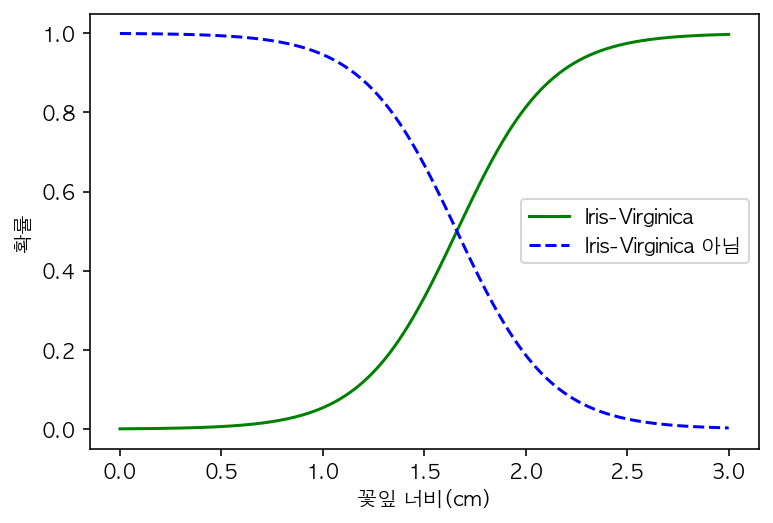

In [46]:
X_new = np.linspace(0, 3, 1000).reshape(-1, 1)
y_proba = log_reg.predict_proba(X_new)
plt.plot(X_new, y_proba[:, 1], "g-", label="Iris-Virginica")
plt.plot(X_new, y_proba[:, 0], "b--", label="Iris-Virginica 아님")
plt.legend()
plt.xlabel("꽃잎 너비(cm)")
plt.ylabel("확률")

양쪽의 확률이 똑같이 50%가 되는 1.6cm근방에서 결정 경계 (decision boundary)가 만들어진다.

In [47]:
log_reg.predict([[1.7], [1.5]])

array([1, 0])

이 모델의 결정 경계는 선형이며 다른 선형 모델처럼 로지스틱 회귀 모델도 L1, L2 패널티를 사용하여 규제할 수 있다. 사이킷런은 L2 패널티를 기본으로 한다.
* 사이킷런의 LogisticRegression 모델의 규제 강도를 조절하는 하이퍼파라미터는 alpha가 아니고 그 역수에 해당하는 C이다. C가 높을수록 모델의 규제가 줄어든다.

### 4.6.4 소프트맥스 회귀

로지스틱 회귀 모델은 여러 개의 이진 분류기를 훈련시켜 연결하지 않고 직접 다중 클래스를 지원하도록 일반화될 수 있고, 이를 소프트맥스 회귀(Softmax Regression) 또는 다항 로지스틱 회귀(Multinomial Logistic Regression)라고 한다.

로지스틱 회귀 분류기와 마찬가지로 소프트맥스 회귀 분류기는 추정 확률이 가장 높은 클래스를 선택합니다.

* 소프트맥스 회귀 분류기는 한 번에 하나의 클래스만 예측한다. (다중클래스(multiclass)지 다중 출력(multioutput)은 아님) 그래서 종류가 다른 붓꽃 같이 상호 배타적인 클래스에서만 사용해야 한다. 하나의 사진에서 여러 사람의 얼굴을 인식하는 데는 사용할 수 없습니다.
* 비용 함수 = 크로스 엔트로피 (cross entropy)

In [50]:
X = iris["data"][:, (2,3)] # 꽃잎 길이, 꽃잎 너비
y = iris["target"]

softmax_reg = LogisticRegression(multi_class="multinomial", solver="lbfgs", C=10)
softmax_reg.fit(X, y)

LogisticRegression(C=10, multi_class='multinomial')

In [51]:
softmax_reg.predict([[5, 2]])

array([2])

In [52]:
softmax_reg.predict_proba([[5, 2]])

array([[6.38014896e-07, 5.74929995e-02, 9.42506362e-01]])

위 소프트맥스 모델의 모든 결정 경계가 만나는 지점에서는 모든 클래스가 동일하게 33%의 추정 확률을 가진다.

### 4.7 연습문제